In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [6]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [7]:
df.shape

(112634, 17)

In [8]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                            int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [9]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [10]:
for i in df.columns:
    print('*'*20,i,'*'*20)
    print(df[i].unique())

******************** VIN (1-10) ********************
['JTMEB3FV6N' '1G1RD6E45D' 'JN1AZ0CP8B' ... 'KMHE14L25K' 'WA1LAAGE5M'
 'YV4ED3GM0P']
******************** County ********************
['Monroe' 'Clark' 'Yakima' 'Skagit' 'Snohomish' 'Island' 'Thurston'
 'Grant' 'St. Clair' 'Pierce' 'Saratoga' 'Stevens' 'King' 'Kitsap'
 'Newport News' 'Jackson' 'Whitman' 'Lake' 'Spokane' 'Clallam' 'Cowlitz'
 'Kittitas' 'Grays Harbor' 'Chelan' 'Whatcom' 'Benton' 'Walla Walla'
 'Mason' 'San Juan' 'Lewis' 'Jefferson' 'Douglas' 'Klickitat' 'Geary'
 'Skamania' 'Fairfax' 'Adams' 'Franklin' 'Okanogan' 'Sonoma' 'Asotin'
 'Ferry' 'Pacific' 'Riverside' 'Orange' 'Columbia' 'Wahkiakum'
 'Leavenworth' 'Contra Costa' 'Howard' 'Larimer' 'District of Columbia'
 'Washington' 'Tipton' 'San Diego' 'Sumter' "Prince George's" 'New Haven'
 'Lincoln' 'Las Animas' 'Frederick' 'Hidalgo' 'Pend Oreille' 'Bexar'
 'Garfield' 'Pennington' 'Honolulu' 'Anne Arundel' 'Montgomery' 'Houston'
 'Charleston' 'Monterey' 'Kern' 'Napa' 'Loud

We can see that we are having more than 400 Null values in column called "Electric Utility"

In [11]:
df[df['Electric Utility'].isna()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
12,3C3CFFGE3G,St. Clair,Mascoutah,IL,62258,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,153786167,POINT (-89.79939 38.49028),NaN,17163504356
19,5YJXCAE28G,Saratoga,Greenfield Center,NY,12833,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,NaN,218050878,POINT (-73.84643 43.1284),NaN,36091060601
21,1G1RD6S55H,Stevens,Nine Mile Falls,WA,99026,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53,0,7.0,141964049,POINT (-117.54392 47.77676),NaN,53065951402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112301,5YJ3E1EB9M,Dorchester,Summerville,SC,29483,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,179604183,POINT (-80.17601 33.01897),NaN,45035010506
112321,1N4BZ1CP7K,Thurston,Olympia,WA,98502,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,22.0,142814556,POINT (-122.92333 47.03779),NaN,53067012002
112394,5UXKT0C36H,Leavenworth,Lansing,KS,66043,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,NaN,122897484,POINT (-94.89874 39.23762),NaN,20103071104
112541,JA4J24A50J,Williams,Williston,ND,58802,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,2592005,POINT (7.86484 51.32975),NaN,38105954100


In [12]:
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

Here we can see that NaN values of 'Electric Utility' are filled using mode of that column.

In [14]:
df['Legislative District'].unique()

array([nan, 15., 39., 38.,  1., 21., 10., 40., 22., 13., 20.,  2., 32.,
        7., 46., 30., 35., 44., 14.,  9.,  3., 23., 24.,  5., 33., 45.,
       19., 27., 26., 25., 43., 17.,  6., 41., 37., 34., 31., 12., 28.,
       48., 49.,  4., 29., 36., 42.,  8., 18., 11., 16., 47.])

In [15]:
mean_value = df['Legislative District'].mean()
df['Legislative District'].fillna(mean_value, inplace=True)

In [16]:
df['Legislative District'] = df['Legislative District'].astype(int)

In [17]:
df['Legislative District'].dtype

dtype('int32')

In [18]:
df['Legislative District'].isnull().sum()

0

In [19]:
df['Model'].unique()

array(['RAV4 PRIME', 'VOLT', 'LEAF', 'BOLT EV', 'FUSION', 'MODEL 3',
       'SOUL', 'Q5 E', 'MODEL X', '500', 'X5', '530E', 'TAYCAN', 'X3',
       'A3', 'SOUL EV', 'C-MAX', 'MODEL S', 'F-150', 'CT6', 'I3',
       'CLARITY', 'MODEL Y', 'NIRO', 'OUTLANDER', 'PACIFICA', 'R1T',
       'KONA ELECTRIC', 'XC40', 'ID.4', 'PRIUS PLUG-IN', 'MUSTANG MACH-E',
       'EQB-CLASS', 'E-GOLF', 'PRIUS PRIME', 'C40', 'SORENTO', 'XC60',
       'CAYENNE', 'WRANGLER', 'COUNTRYMAN', 'S60', 'EV6',
       'FORTWO ELECTRIC DRIVE', 'GRAND CHEROKEE', '330E', 'CROSSTREK',
       'IONIQ 5', 'IONIQ', 'E-TRON', 'ROADSTER', 'KONA', 'XC90', 'SPARK',
       'PS2', 'A7', 'HARDTOP', 'ESCAPE', 'LUCID AIR', 'E-TRON SPORTBACK',
       'Q5', 'RAV4', 'AVIATOR', 'E-TRON GT', 'EDV', 'IX', 'FORTWO',
       'I-PACE', 'SANTA FE', 'B-CLASS', 'KARMA', 'I4', 'OPTIMA',
       'GLC-CLASS', 'Q4', 'SONATA', 'EQ FORTWO', 'FOCUS',
       'RANGE ROVER SPORT', 'TRANSIT', 'PANAMERA', 'I8', 'BOLT EUV',
       'CORSAIR', 'ELR', 'GLE-CLASS', 'V60

In [20]:
df['Model'].mode()

0    MODEL 3
Name: Model, dtype: object

So, Lets fill the null values in this column with "Model 3"

In [21]:
df['Model'].fillna(df['Model'].mode()[0], inplace=True)

In [22]:
df['Model'].isnull().sum()

0

So, upto now we have cleared all null values lets start univariate and bivariate analysis with both numerical and categorical data

#### Univariate Analysis

In [23]:
numerical_df = df.select_dtypes(include="number")

In [24]:
numerical_df

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,33040,2022,42,0,29,198968248,12087972100
1,89029,2013,38,0,29,5204412,32003005702
2,98901,2011,73,0,15,218972519,53077001602
3,98237,2017,238,0,39,186750406,53057951101
4,98201,2019,26,0,38,2006714,53061041500
...,...,...,...,...,...,...,...
112629,98019,2022,0,0,45,217955265,53033032401
112630,98250,2019,150,0,40,103663227,53055960301
112631,98070,2022,38,0,34,193878387,53033027702
112632,98042,2018,26,0,47,125039043,53033032007


In [25]:
numerical_df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

In [26]:
df['Base MSRP'].unique()

array([     0,  31950,  55700,  33950,  69900,  36900,  43700,  34995,
        39995,  32250,  44100, 110950,  59900,  52900,  54950, 102000,
        45600,  53400,  64950, 184400,  90700,  36800,  81100,  75095,
        52650,  91250, 109000,  98950,  89100, 845000], dtype=int64)

In [27]:
df['Postal Code'].unique()

array([33040, 89029, 98901, 98237, 98201, 98021, 98203, 98275, 98236,
       98221, 98516, 98837, 62258, 98579, 98233, 98344, 98271, 98037,
       12833, 98026, 99026, 98502, 98087, 98125, 98001, 98115, 98020,
       98260, 98503, 98501, 98208, 98296, 98312, 98036, 98204, 23602,
       98902, 98908, 73521, 99163, 60035, 99205, 98392, 98272, 98382,
       98345, 98513, 60031, 98038, 98270, 98031, 98155, 98370, 98290,
       98052, 98029, 98632, 98406, 98926, 98168, 98329, 98373, 98074,
       98102, 98595, 98683, 98011, 99001, 98075, 98040, 98292, 98053,
       98110, 98032, 98112, 98122, 98116, 98002, 98822, 98498, 98391,
       98106, 98402, 98008, 98663, 99212, 98033, 98144, 98446, 98107,
       98059, 98367, 98225, 98661, 99354, 98004, 98282, 98801, 98103,
       98178, 98258, 98684, 98686, 98229, 98580, 98332, 98101, 98198,
       98177, 98607, 99338, 98136, 98366, 98105, 98058, 98012, 98166,
       99352, 98118, 98604, 98685, 98121, 99362, 98045, 98006, 98034,
       98056, 98506,

In [28]:
df['Model Year'].unique()

array([2022, 2013, 2011, 2017, 2019, 2018, 2016, 2020, 2021, 2015, 2014,
       2012, 2023, 2010, 2008, 2000, 1997, 1999, 1998, 2002], dtype=int64)

In [29]:
df['Electric Range'].unique()

array([ 42,  38,  73, 238,  26, 215,  75,  84,  93,  20, 293,  53, 150,
       107,  14, 200,   0,  15, 151, 266, 192,  17,  16, 220, 111,  19,
        87, 249, 210,  31, 208,  72, 259,  47, 291, 239,  22, 322,  32,
         6, 203,  83,  25, 125,  21, 149,  97, 289,  18,  13,  12,  68,
        30, 308, 170, 204, 245, 258, 126,  82,  29,  24, 110, 218,  41,
       265, 330, 222,  23, 103, 270,  35,  58,  33, 234,  81, 153, 114,
        10,  27,  76,  28,  40,   8, 337,  37,  62,  34, 233,   9, 124,
       100,  57,  56,  39,  48,  74,  36,  11,  59,  95], dtype=int64)

In [30]:
df['Legislative District'].unique()

array([29, 15, 39, 38,  1, 21, 10, 40, 22, 13, 20,  2, 32,  7, 46, 30, 35,
       44, 14,  9,  3, 23, 24,  5, 33, 45, 19, 27, 26, 25, 43, 17,  6, 41,
       37, 34, 31, 12, 28, 48, 49,  4, 36, 42,  8, 18, 11, 16, 47])

In [31]:
def numerical_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10,col_name,"*"*10)
        print(numerical_data[col_name].agg(['min','max','skew','mean','std','kurt','median']))
        print()

In [32]:
numerical_analysis(df[['Electric Range','Base MSRP','Legislative District']])

********** Electric Range **********
min         0.000000
max       337.000000
skew        0.817103
mean       87.812987
std       102.334216
kurt       -0.876312
median     32.000000
Name: Electric Range, dtype: float64

********** Base MSRP **********
min            0.000000
max       845000.000000
skew          10.100497
mean        1793.439681
std        10783.753486
kurt         371.695682
median         0.000000
Name: Base MSRP, dtype: float64

********** Legislative District **********
min        1.000000
max       49.000000
skew      -0.542587
mean      29.803558
std       14.681925
kurt      -0.976292
median    34.000000
Name: Legislative District, dtype: float64



<AxesSubplot:>

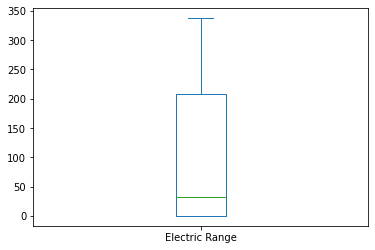

In [33]:
df['Electric Range'].plot(kind='box')

<AxesSubplot:>

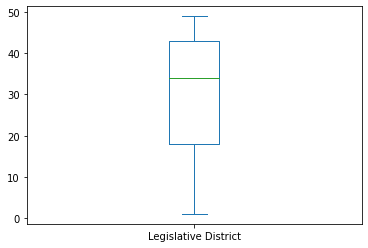

In [34]:
df['Legislative District'].plot(kind='box')

<AxesSubplot:>

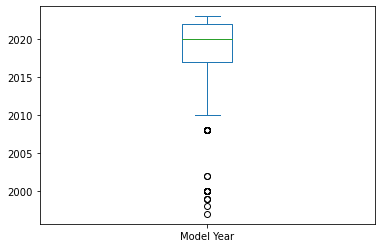

In [35]:
df['Model Year'].plot(kind='box')

In [36]:
df[df['Model Year']<2005][['Model Year']].count()

Model Year    17
dtype: int64

Removing those outliers

<AxesSubplot:>

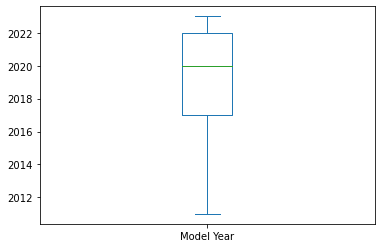

In [37]:
df=df[df['Model Year']>2010]
df['Model Year'].plot(kind='box')

In [38]:
df.shape

(112570, 17)

<AxesSubplot:ylabel='Frequency'>

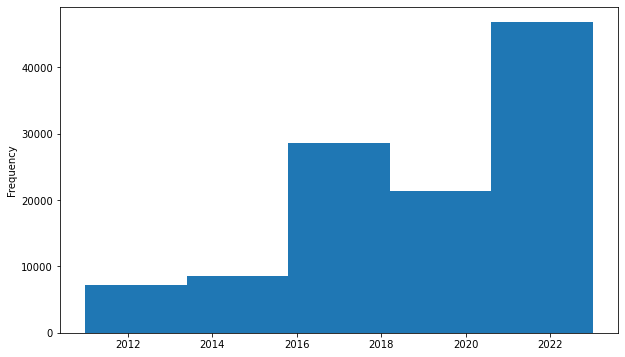

In [39]:
plt.figure(figsize=(10,6))
df['Model Year'].plot(kind='hist',bins=5)

<AxesSubplot:ylabel='Density'>

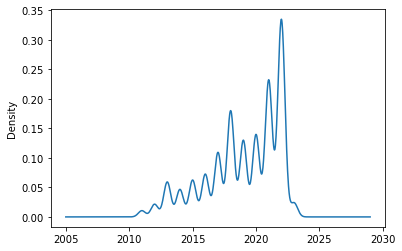

In [40]:
df['Model Year'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

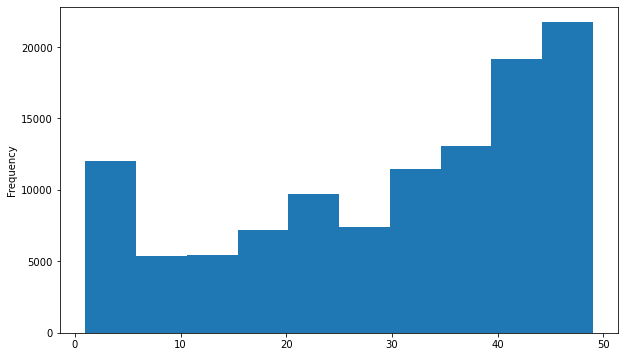

In [41]:
plt.figure(figsize=(10,6))
df['Legislative District'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

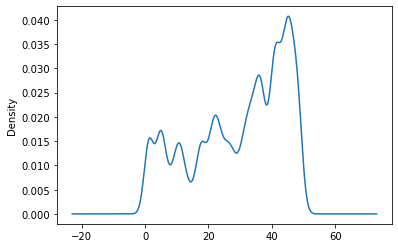

In [42]:
df['Legislative District'].plot(kind='kde')

In [43]:
categorical_df = df.select_dtypes(include="object")

In [44]:
categorical_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [45]:
def categorical_analysis(cat_data):
    for col_name in cat_data:
        print("*"*10,col_name,"*"*10)
        print(cat_data[col_name].agg(['count','nunique','unique']))
        print("value counts: \n",cat_data[col_name].value_counts(normalize='True'))
        print()

In [46]:
categorical_analysis(df[['County','Model','State']])

********** County **********
count                                                 112570
nunique                                                  165
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
Name: County, dtype: object
value counts: 
 King          0.523807
Snohomish     0.110420
Pierce        0.075775
Clark         0.059394
Thurston      0.036653
                ...   
Pinal         0.000009
Elmore        0.000009
Portsmouth    0.000009
Kings         0.000009
Kootenai      0.000009
Name: County, Length: 165, dtype: float64

********** Model **********
count                                                 112570
nunique                                                  112
unique     [RAV4 PRIME, VOLT, LEAF, BOLT EV, FUSION, MODE...
Name: Model, dtype: object
value counts: 
 MODEL 3        0.205694
MODEL Y        0.152279
LEAF           0.114418
MODEL S        0.065533
BOLT EV        0.043617
                 ...   
BENTAYGA       0.000018
745LE          0.000018
SO

<AxesSubplot:>

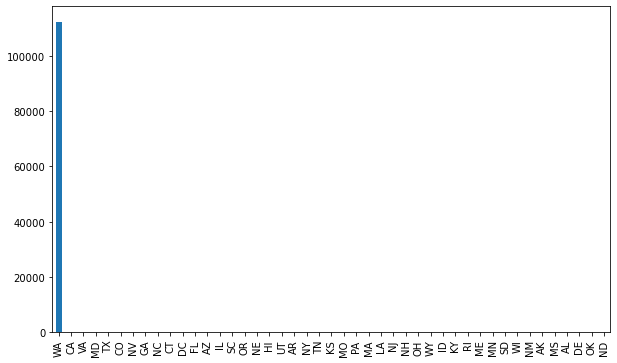

In [47]:
plt.figure(figsize=(10,6))
df['State'].value_counts().plot(kind='bar')

In [48]:
df=df[~df['State'].isin(['KY','RI','ME','MN','SD','WI','NM','AK','MS','AL','DE','OK','ND',
                        'ID','WY','OH','NH','NJ','LA','MA','PA','MO','KS','TN','HI','UT','AR','NY',
                        'SC','OR','NE','CT','DC','FL','AZ','IL','GA','NC',''])]
df.shape

(112453, 17)

<AxesSubplot:>

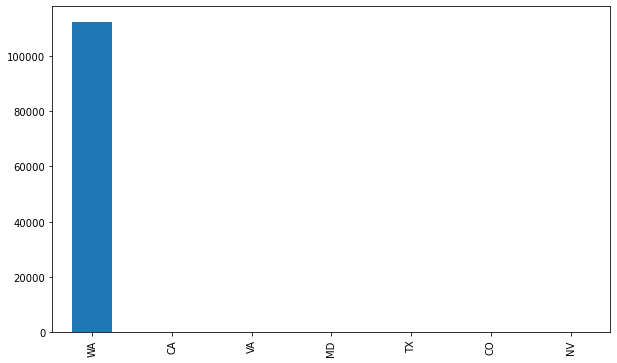

In [49]:
plt.figure(figsize=(10,6))
df['State'].value_counts().plot(kind='bar')

<AxesSubplot:>

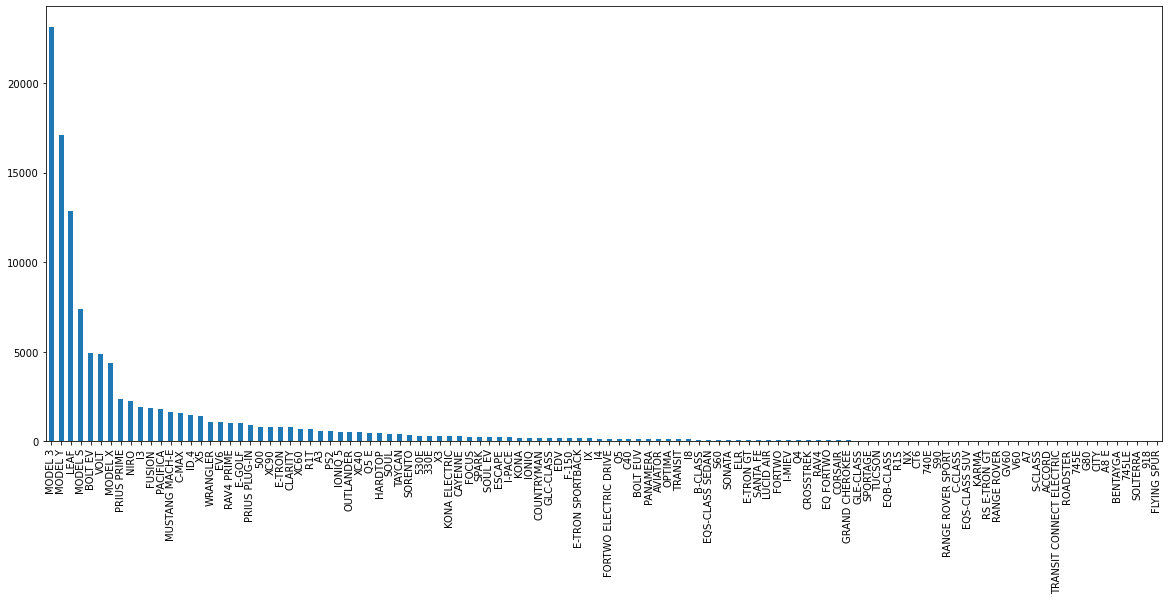

In [50]:
plt.figure(figsize=(20,8))
df['Model'].value_counts().plot(kind='bar')

In [51]:
import pandas as pd

# Assuming your DataFrame is 'df' and your categorical column is 'Model'

# Step 1: Calculate the total number of occurrences
total_count = len(df['Model'])

# Step 2: Calculate the value counts and frequency percentage, rounded to 3 decimal places
value_counts = df['Model'].value_counts()
frequencies = (value_counts / total_count).round(3)

# Step 3: Identify categories with frequency less than 2% (0.02)
rare_categories = frequencies[frequencies < 0.02].index

# Step 4: Remove rows with these rare categories
df_filtered = df[~df['Model'].isin(rare_categories)]

# Optional: Reset the index after filtering
df_filtered.reset_index(drop=True, inplace=True)

# Display the filtered DataFrame
df_filtered.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
1,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
2,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
3,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
4,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900


In [52]:
df.shape

(112453, 17)

In [53]:
total_count = len(df['Model'])

value_counts = df['Model'].value_counts()
frequencies = (value_counts / total_count).round(3)

rare_categories = frequencies[frequencies < 0.02].index

df = df[~df['Model'].isin(rare_categories)]

df.reset_index(drop=True, inplace=True)

print(f"Updated dataset length: {len(df)}")
print(df['Model'].value_counts())

df.head()

Updated dataset length: 79298
MODEL 3        23131
MODEL Y        17123
LEAF           12871
MODEL S         7374
BOLT EV         4908
VOLT            4891
MODEL X         4367
PRIUS PRIME     2377
NIRO            2256
Name: Model, dtype: int64


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
1,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
2,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
3,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
4,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900


In [54]:
df.shape

(79298, 17)

<AxesSubplot:>

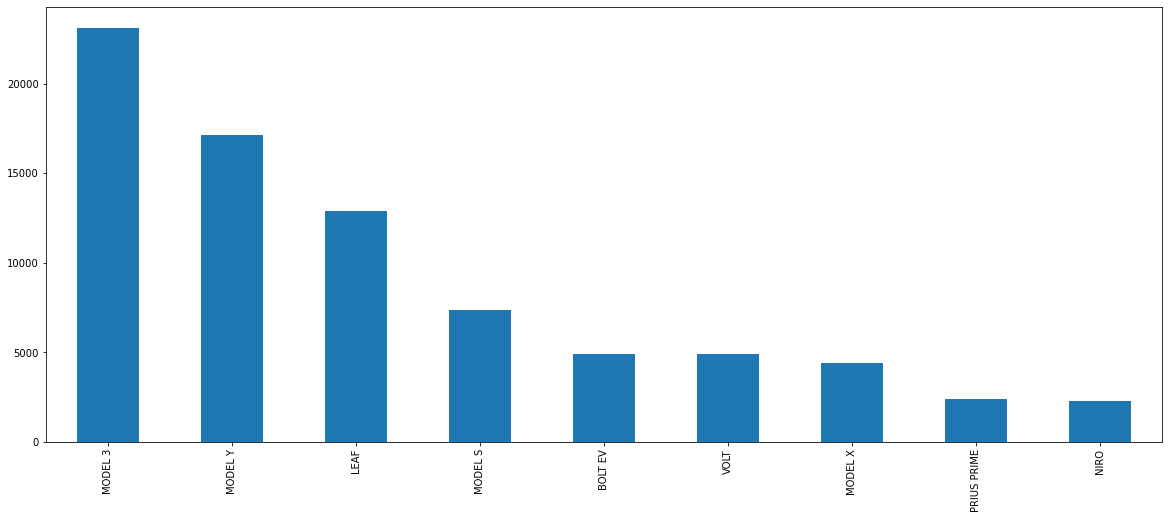

In [55]:
plt.figure(figsize=(20,8))
df['Model'].value_counts().plot(kind='bar')

<AxesSubplot:>

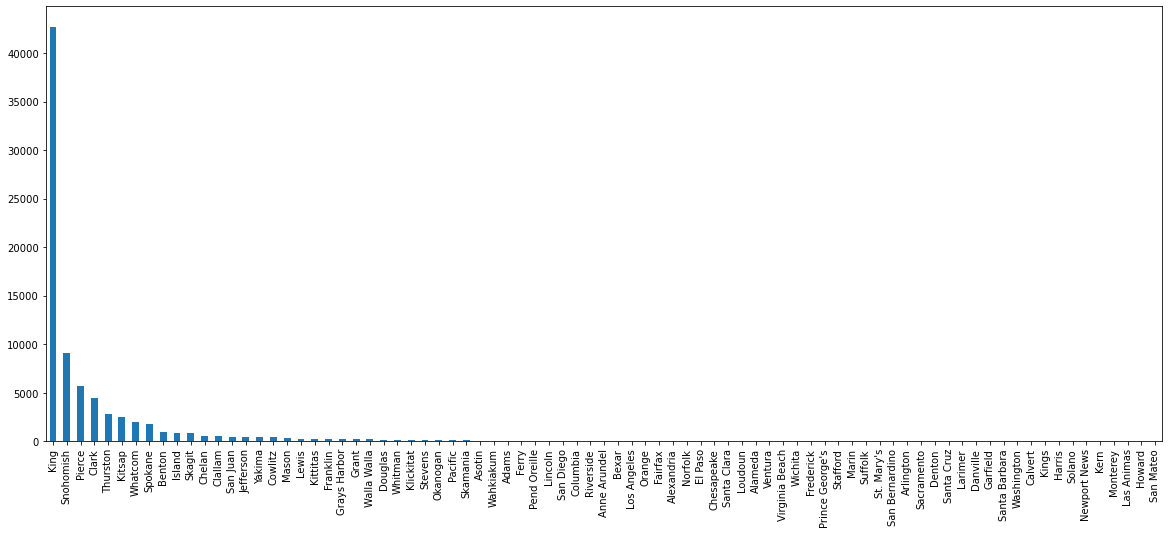

In [56]:
plt.figure(figsize=(20,8))
df['County'].value_counts().plot(kind='bar')

In [57]:
df['County'].value_counts()

King          42665
Snohomish      9112
Pierce         5705
Clark          4467
Thurston       2768
              ...  
Kern              1
Monterey          1
Las Animas        1
Howard            1
San Mateo         1
Name: County, Length: 81, dtype: int64

In [58]:
import pandas as pd

value_counts = df['County'].value_counts()

rare_counties = value_counts[value_counts < 10].index

df = df[~df['County'].isin(rare_counties)]

df.reset_index(drop=True, inplace=True)

print(f"Updated dataset length: {len(df)}")
print(df['County'].value_counts())

Updated dataset length: 79207
King            42665
Snohomish        9112
Pierce           5705
Clark            4467
Thurston         2768
Kitsap           2472
Whatcom          1961
Spokane          1790
Benton            926
Island            892
Skagit            860
Chelan            509
Clallam           501
San Juan          487
Jefferson         479
Yakima            415
Cowlitz           394
Mason             361
Lewis             281
Kittitas          270
Franklin          259
Grays Harbor      238
Grant             234
Walla Walla       204
Douglas           166
Whitman           126
Klickitat         118
Stevens           103
Okanogan           97
Pacific            94
Skamania           89
Asotin             37
Wahkiakum          26
Adams              24
Ferry              23
Pend Oreille       22
San Diego          16
Lincoln            16
Name: County, dtype: int64


In [59]:
df.shape

(79207, 17)

<AxesSubplot:>

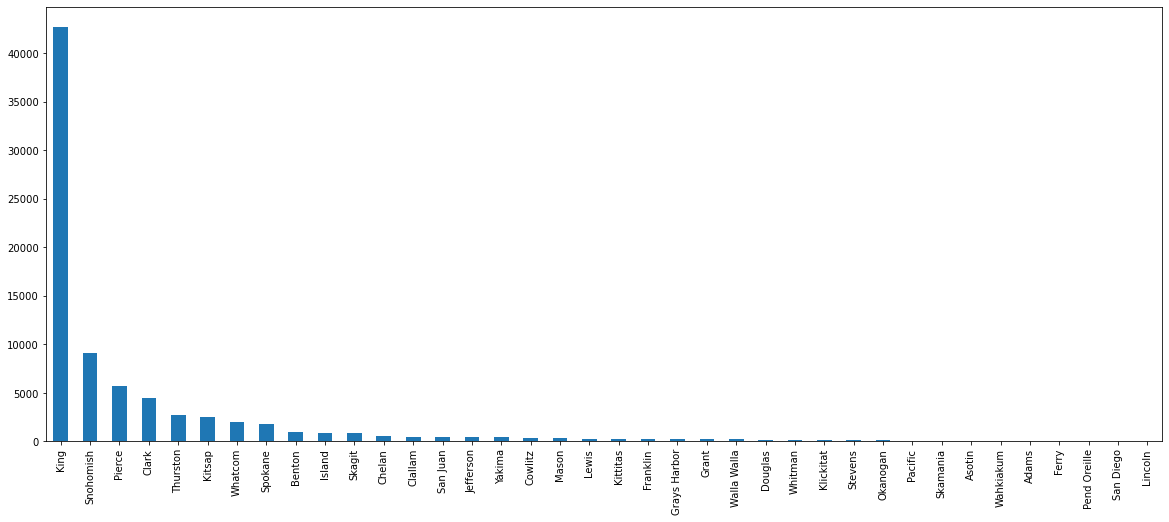

In [60]:
plt.figure(figsize=(20,8))
df['County'].value_counts().plot(kind='bar')

In [61]:
categorical_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

<AxesSubplot:>

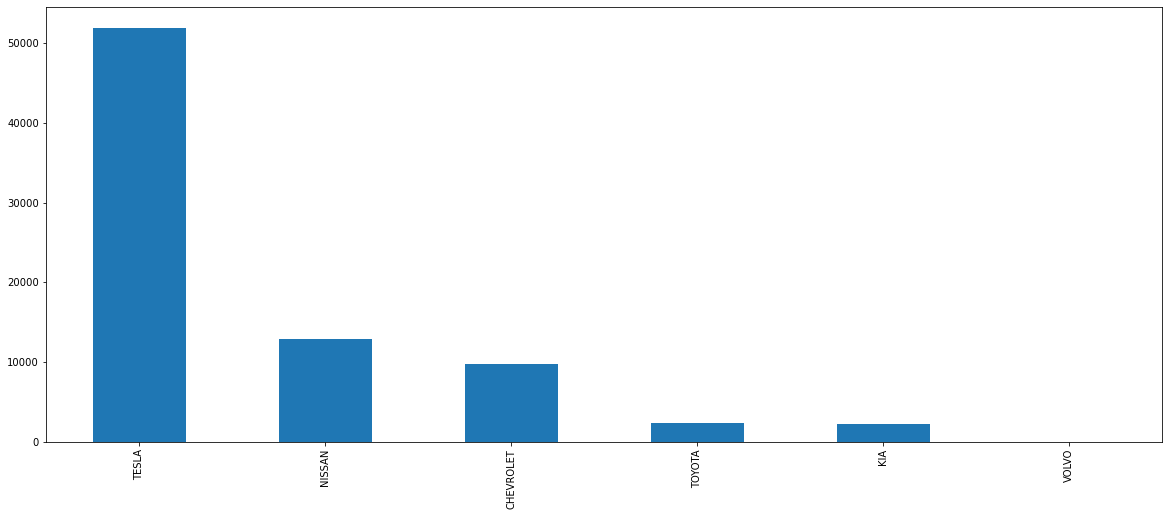

In [62]:
plt.figure(figsize=(20,8))
df['Make'].value_counts().plot(kind='bar')

In [63]:
df['Make'].value_counts()

TESLA        51907
NISSAN       12864
CHEVROLET     9788
TOYOTA        2373
KIA           2255
VOLVO           20
Name: Make, dtype: int64

<AxesSubplot:>

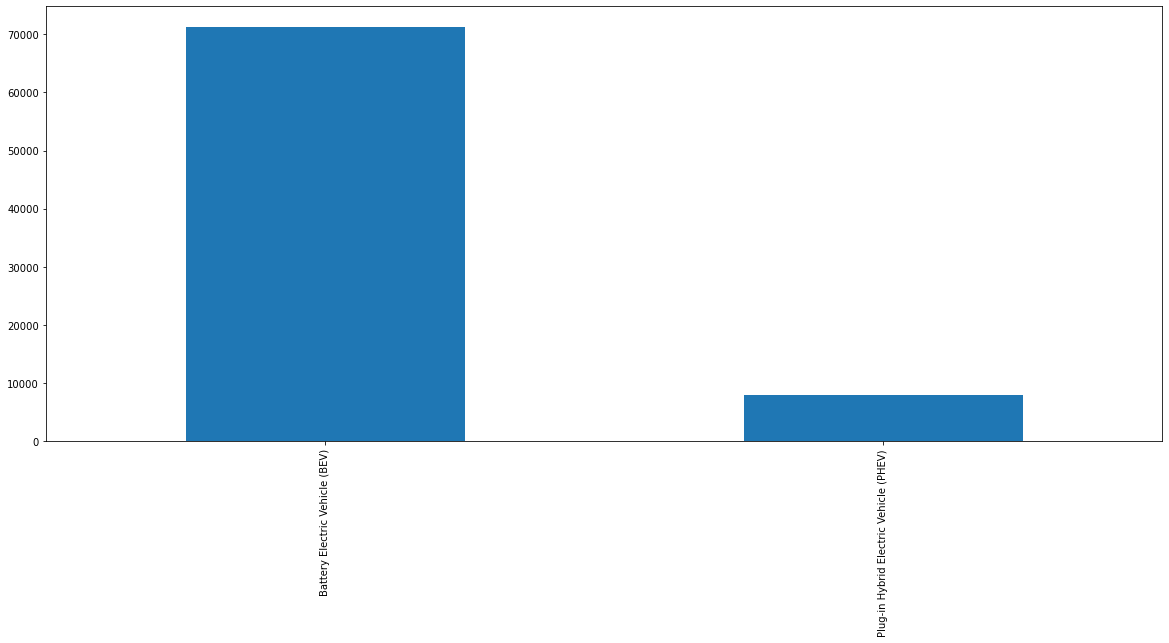

In [64]:
plt.figure(figsize=(20,8))
df['Electric Vehicle Type'].value_counts().plot(kind='bar')

<AxesSubplot:>

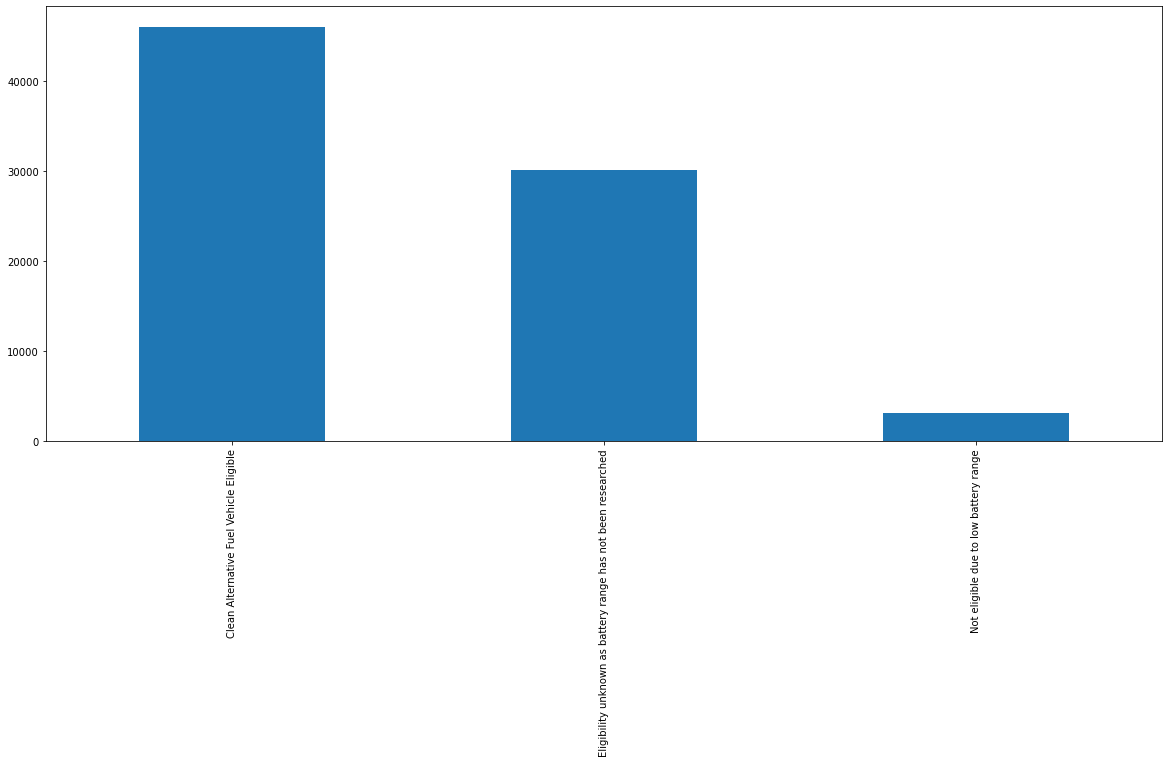

In [65]:
plt.figure(figsize=(20,8))
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot(kind='bar')

### Bivariate Analysis

#### Numerical vs Numerical

In [66]:
numerical_df.columns

Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')

<AxesSubplot:xlabel='Model Year', ylabel='Electric Range'>

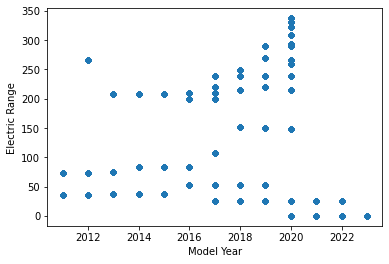

In [67]:
df.plot(kind='scatter',x='Model Year',y='Electric Range')

#### Numerical vs Categorical  

<AxesSubplot:title={'center':'Electric Range'}, xlabel='State'>

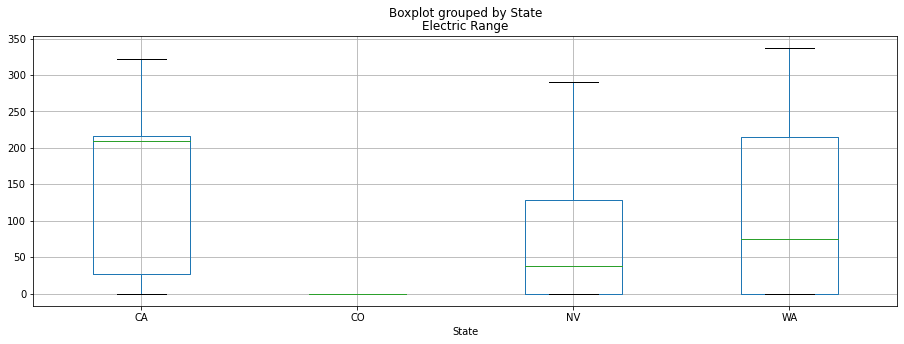

In [68]:
df.boxplot(by='State',column='Electric Range',figsize=(15,5))

<AxesSubplot:title={'center':'Electric Range'}, xlabel='Electric Vehicle Type'>

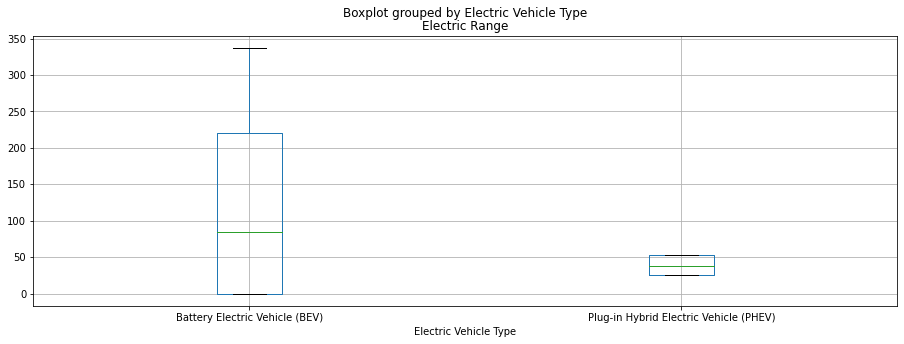

In [69]:
df.boxplot(by='Electric Vehicle Type',column='Electric Range',figsize=(15,5))

<AxesSubplot:title={'center':'Electric Range'}, xlabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

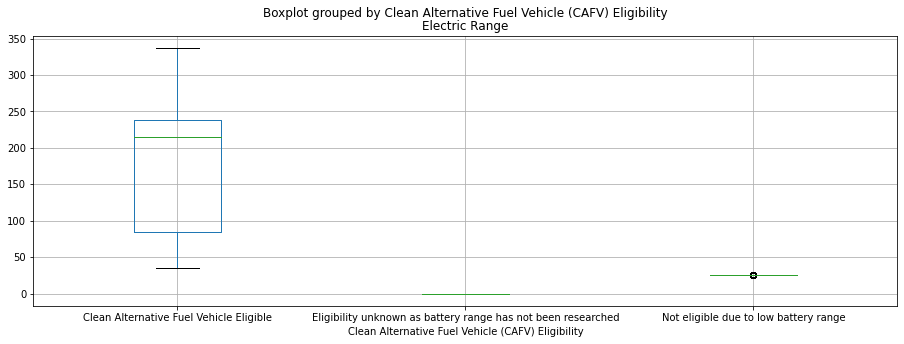

In [70]:
df.boxplot(by='Clean Alternative Fuel Vehicle (CAFV) Eligibility',column = 'Electric Range',figsize=(15,5))

In [71]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
import plotly.express as px

In [73]:
ev_counts_by_location = df.groupby('County')['Model'].count().reset_index()

In [74]:
ev_counts_by_location.columns = ['County', 'EV_Count']

In [76]:
ev_counts_by_state = df.groupby('State')['Model'].count().reset_index()

In [77]:
ev_counts_by_state.columns = ['State', 'EV_Count']

In [78]:
fig = px.choropleth(
    ev_counts_by_state, 
    locations='State',            
    locationmode='USA-states',    
    color='EV_Count',            
    color_continuous_scale="Viridis", 
    scope="usa",                  
    labels={'EV_Count': 'Number of EV Vehicles'},  
    title="EV Vehicle Distribution by State"
)

In [79]:
fig.show()

In [80]:
pip install bar-chart-race

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
import bar_chart_race as bcr 

In [93]:
import pandas as pd
import plotly.express as px

ev_make_year_counts = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')


fig = px.bar(
    ev_make_year_counts,
    x='Make',                
    y='Count',               
    color='Make',            
    animation_frame='Model Year',  
    animation_group='Make',  
    range_y=[0, ev_make_year_counts['Count'].max() + 100],  
    title='EV Make Count Over Years',
    labels={'Count': 'Number of EV Vehicles', 'Make': 'EV Make'},
    template='plotly_dark'  
)


fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  
    yaxis_title='EV Count',
    xaxis_title='EV Make',
    showlegend=False  
)

fig.show()


In [94]:
df.to_csv('Cleaned_file.csv', index=False) 